# Driven Data Code
### 1. Jonathan David, NIM: 01112210010
### 2. Vira Jessica, NIM: 01112210045

In [ ]:
import numpy as np
import pandas as pd
#import scikitplot as skplt
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Library related to Feedforward Neural Network:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Import train_values

In [1]:
# Reading CSV using Pandas: Loading train_values.
data1 = pd.read_csv("train_values.csv", delimiter = ';')
df_values = pd.DataFrame(data1)
df_values.head()

NameError: name 'pd' is not defined

In [4]:
df_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Checking if there's any null data in train_values.
data1.isnull().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

# Import train_labels

In [9]:
# Reading CSV using Pandas: Loading train_labels.
data2 = pd.read_csv("train_labels.csv", delimiter = ',')
df_labels = pd.DataFrame(data2)
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [10]:
df_labels.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [11]:
# Checking if there's any null data in train_labels.
data2.isnull().any()

building_id     False
damage_grade    False
dtype: bool

# Import test_values

In [12]:
# Reading CSV using Pandas: Loading test_values.
data3 = pd.read_csv("test_values.csv", delimiter = ';')
df_test = pd.DataFrame(data3)
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_test.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.686800e+04,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,...,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,5.266279e+05,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,...,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,3.037828e+05,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,...,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,7.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.644215e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.269835e+05,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890842e+05,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052923e+06,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Checking if there's any null data in test_values.
data3.isnull().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

# Data Preprocessing: Changing Categorical to Numerical Data

In [15]:
cat_vars = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
lbl = preprocessing.LabelEncoder()
for col in cat_vars:
    df_values[col] = lbl.fit_transform(df_values[col].astype(str).values)
    df_test[col] = lbl.fit_transform(df_test[col].astype(str).values)

In [16]:
cat_vars1 = ['damage_grade']
lbl1 = preprocessing.LabelEncoder()
for col in cat_vars1:
    df_labels[col] = lbl1.fit_transform(df_labels[col].astype(str).values)

In [17]:
df_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_labels.head()

,building_id,damage_grade
0,802906,2
1,28830,1
2,94947,2
3,590882,1
4,201944,2


In [19]:
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,2,2,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,2,2,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,2,2,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,2,2,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing: Finding Colinearity between Features (Train Data)

In [20]:
# Finding colinearity.
df_corr = df_values.corr()

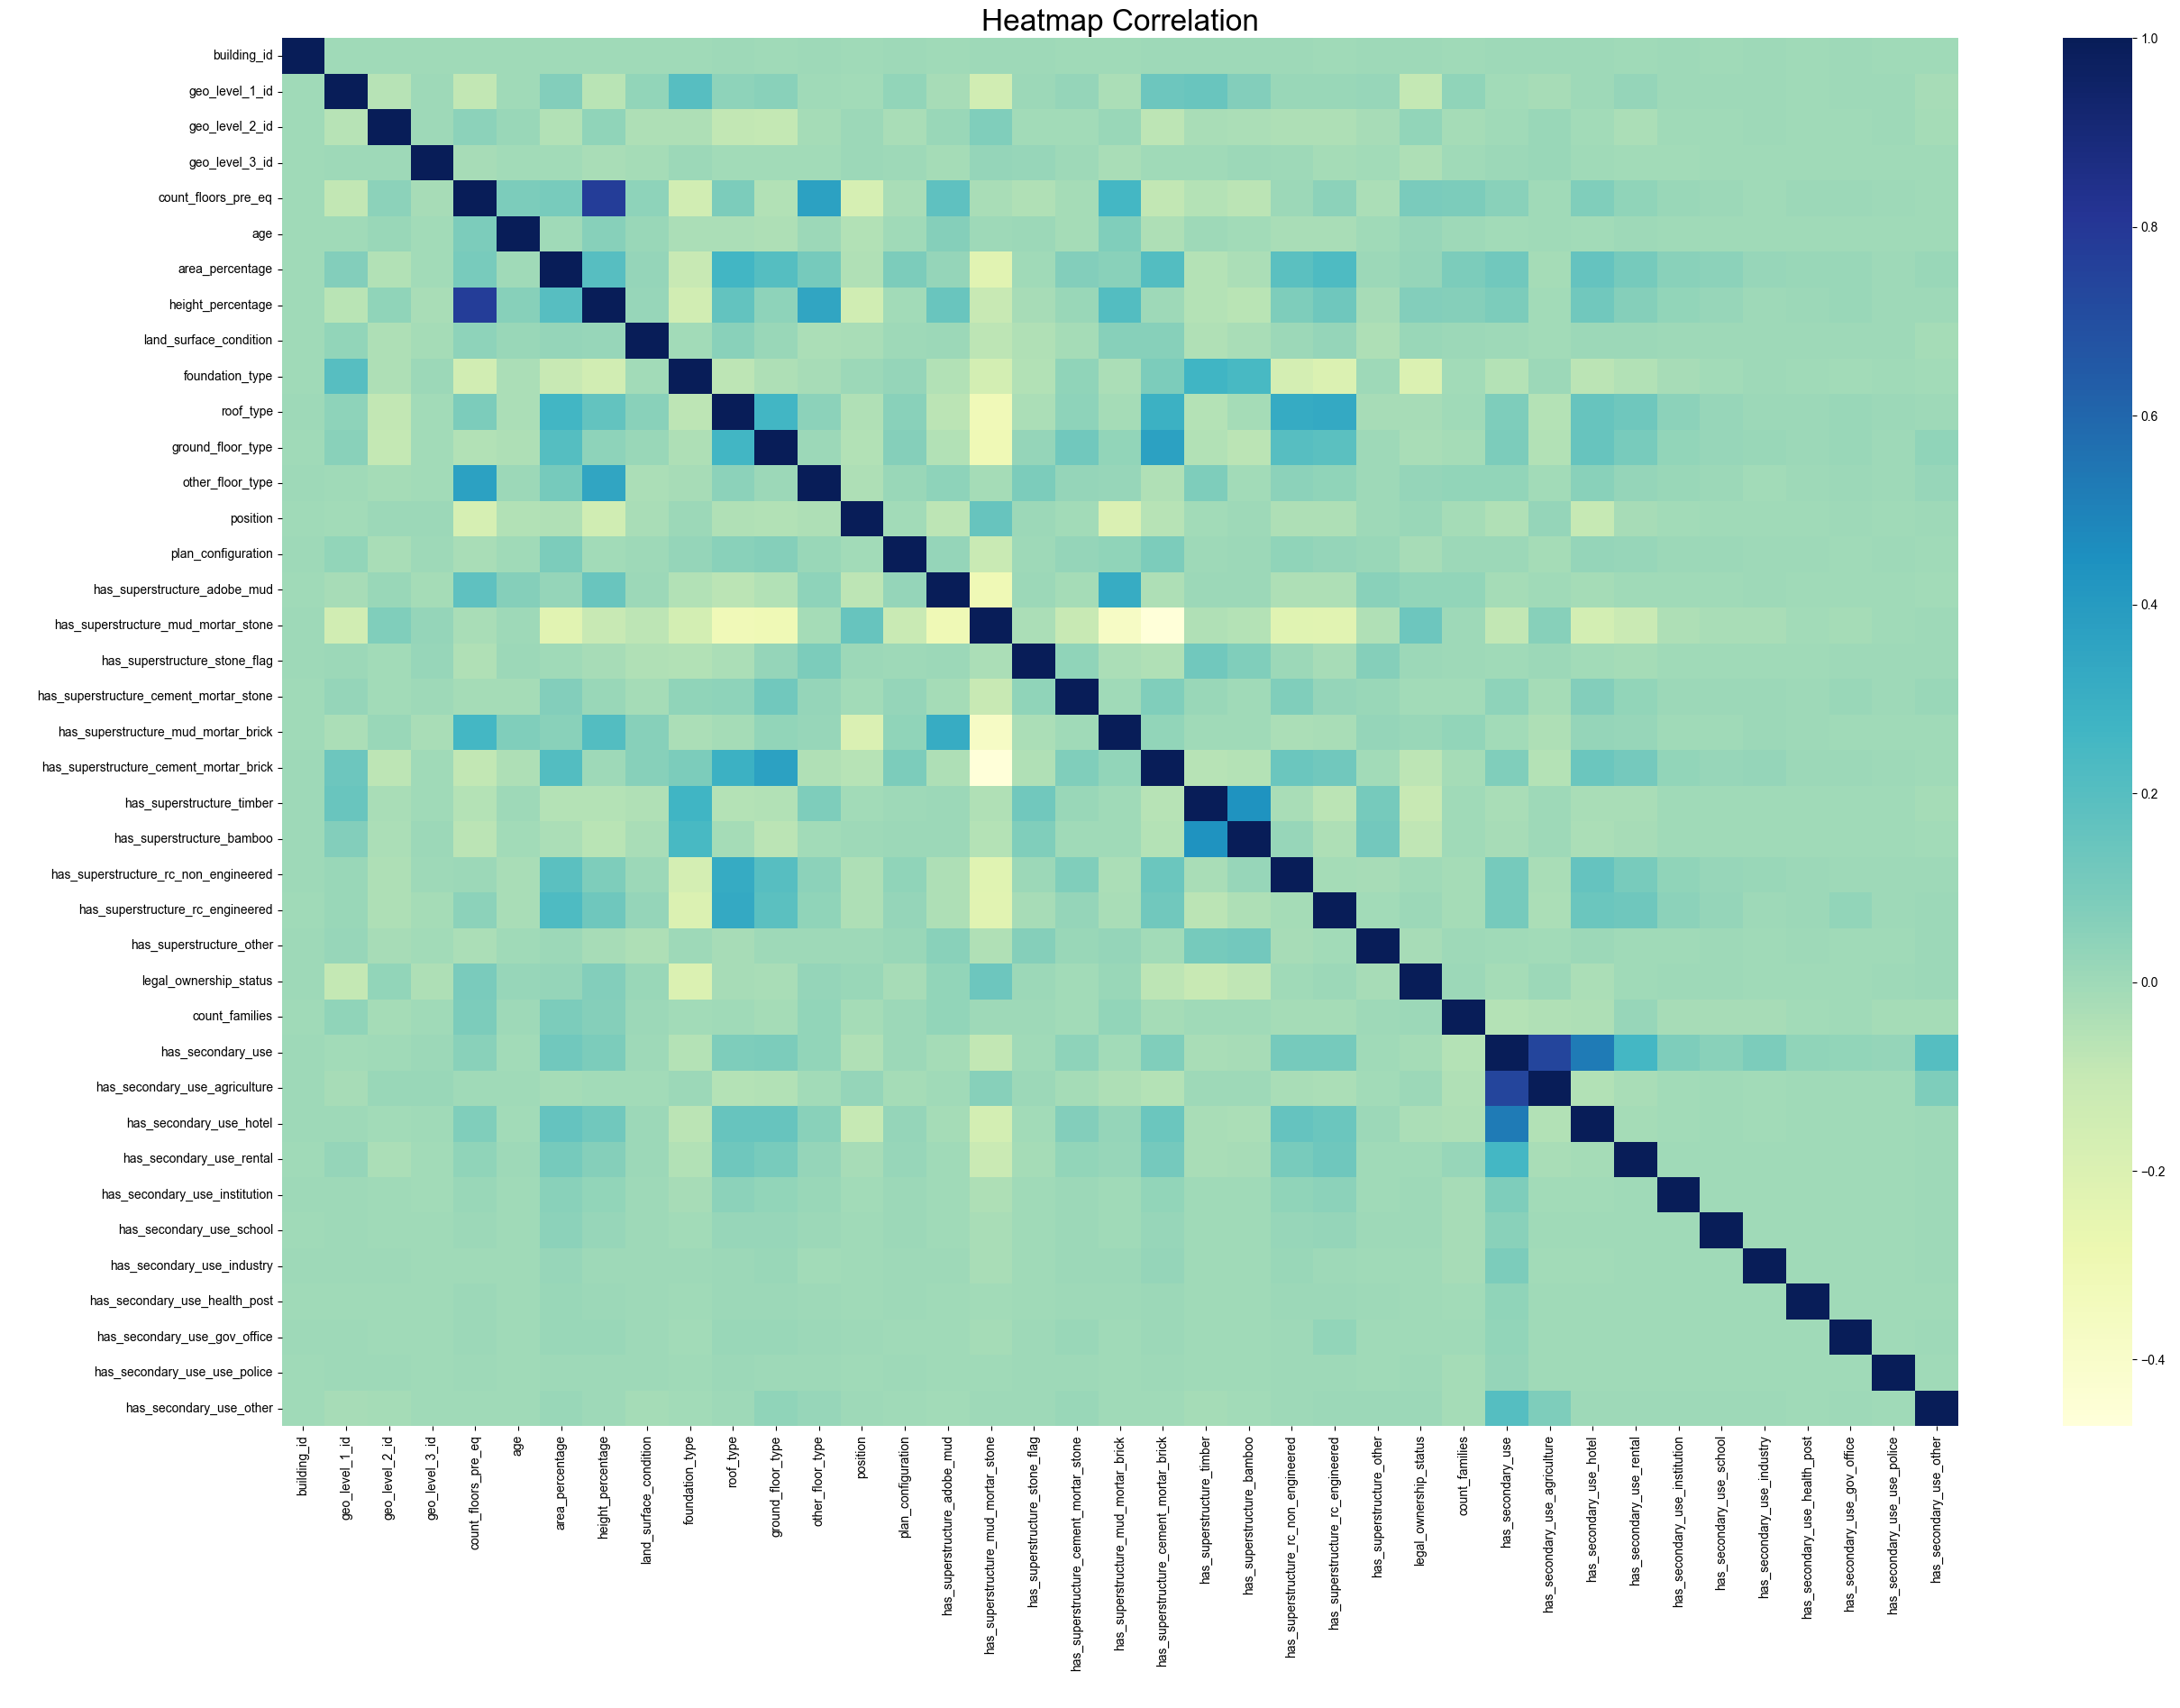

In [21]:
# Displaying the heatmap.
plt.figure(figsize = (30, 20))
sns.heatmap(df_corr, cmap = "YlGnBu")
sns.set(font_scale = 2, style = 'white')

plt.title('Heatmap Correlation')
plt.show()

# Data Preprocessing: Finding Colinearity between Features (Test Data)


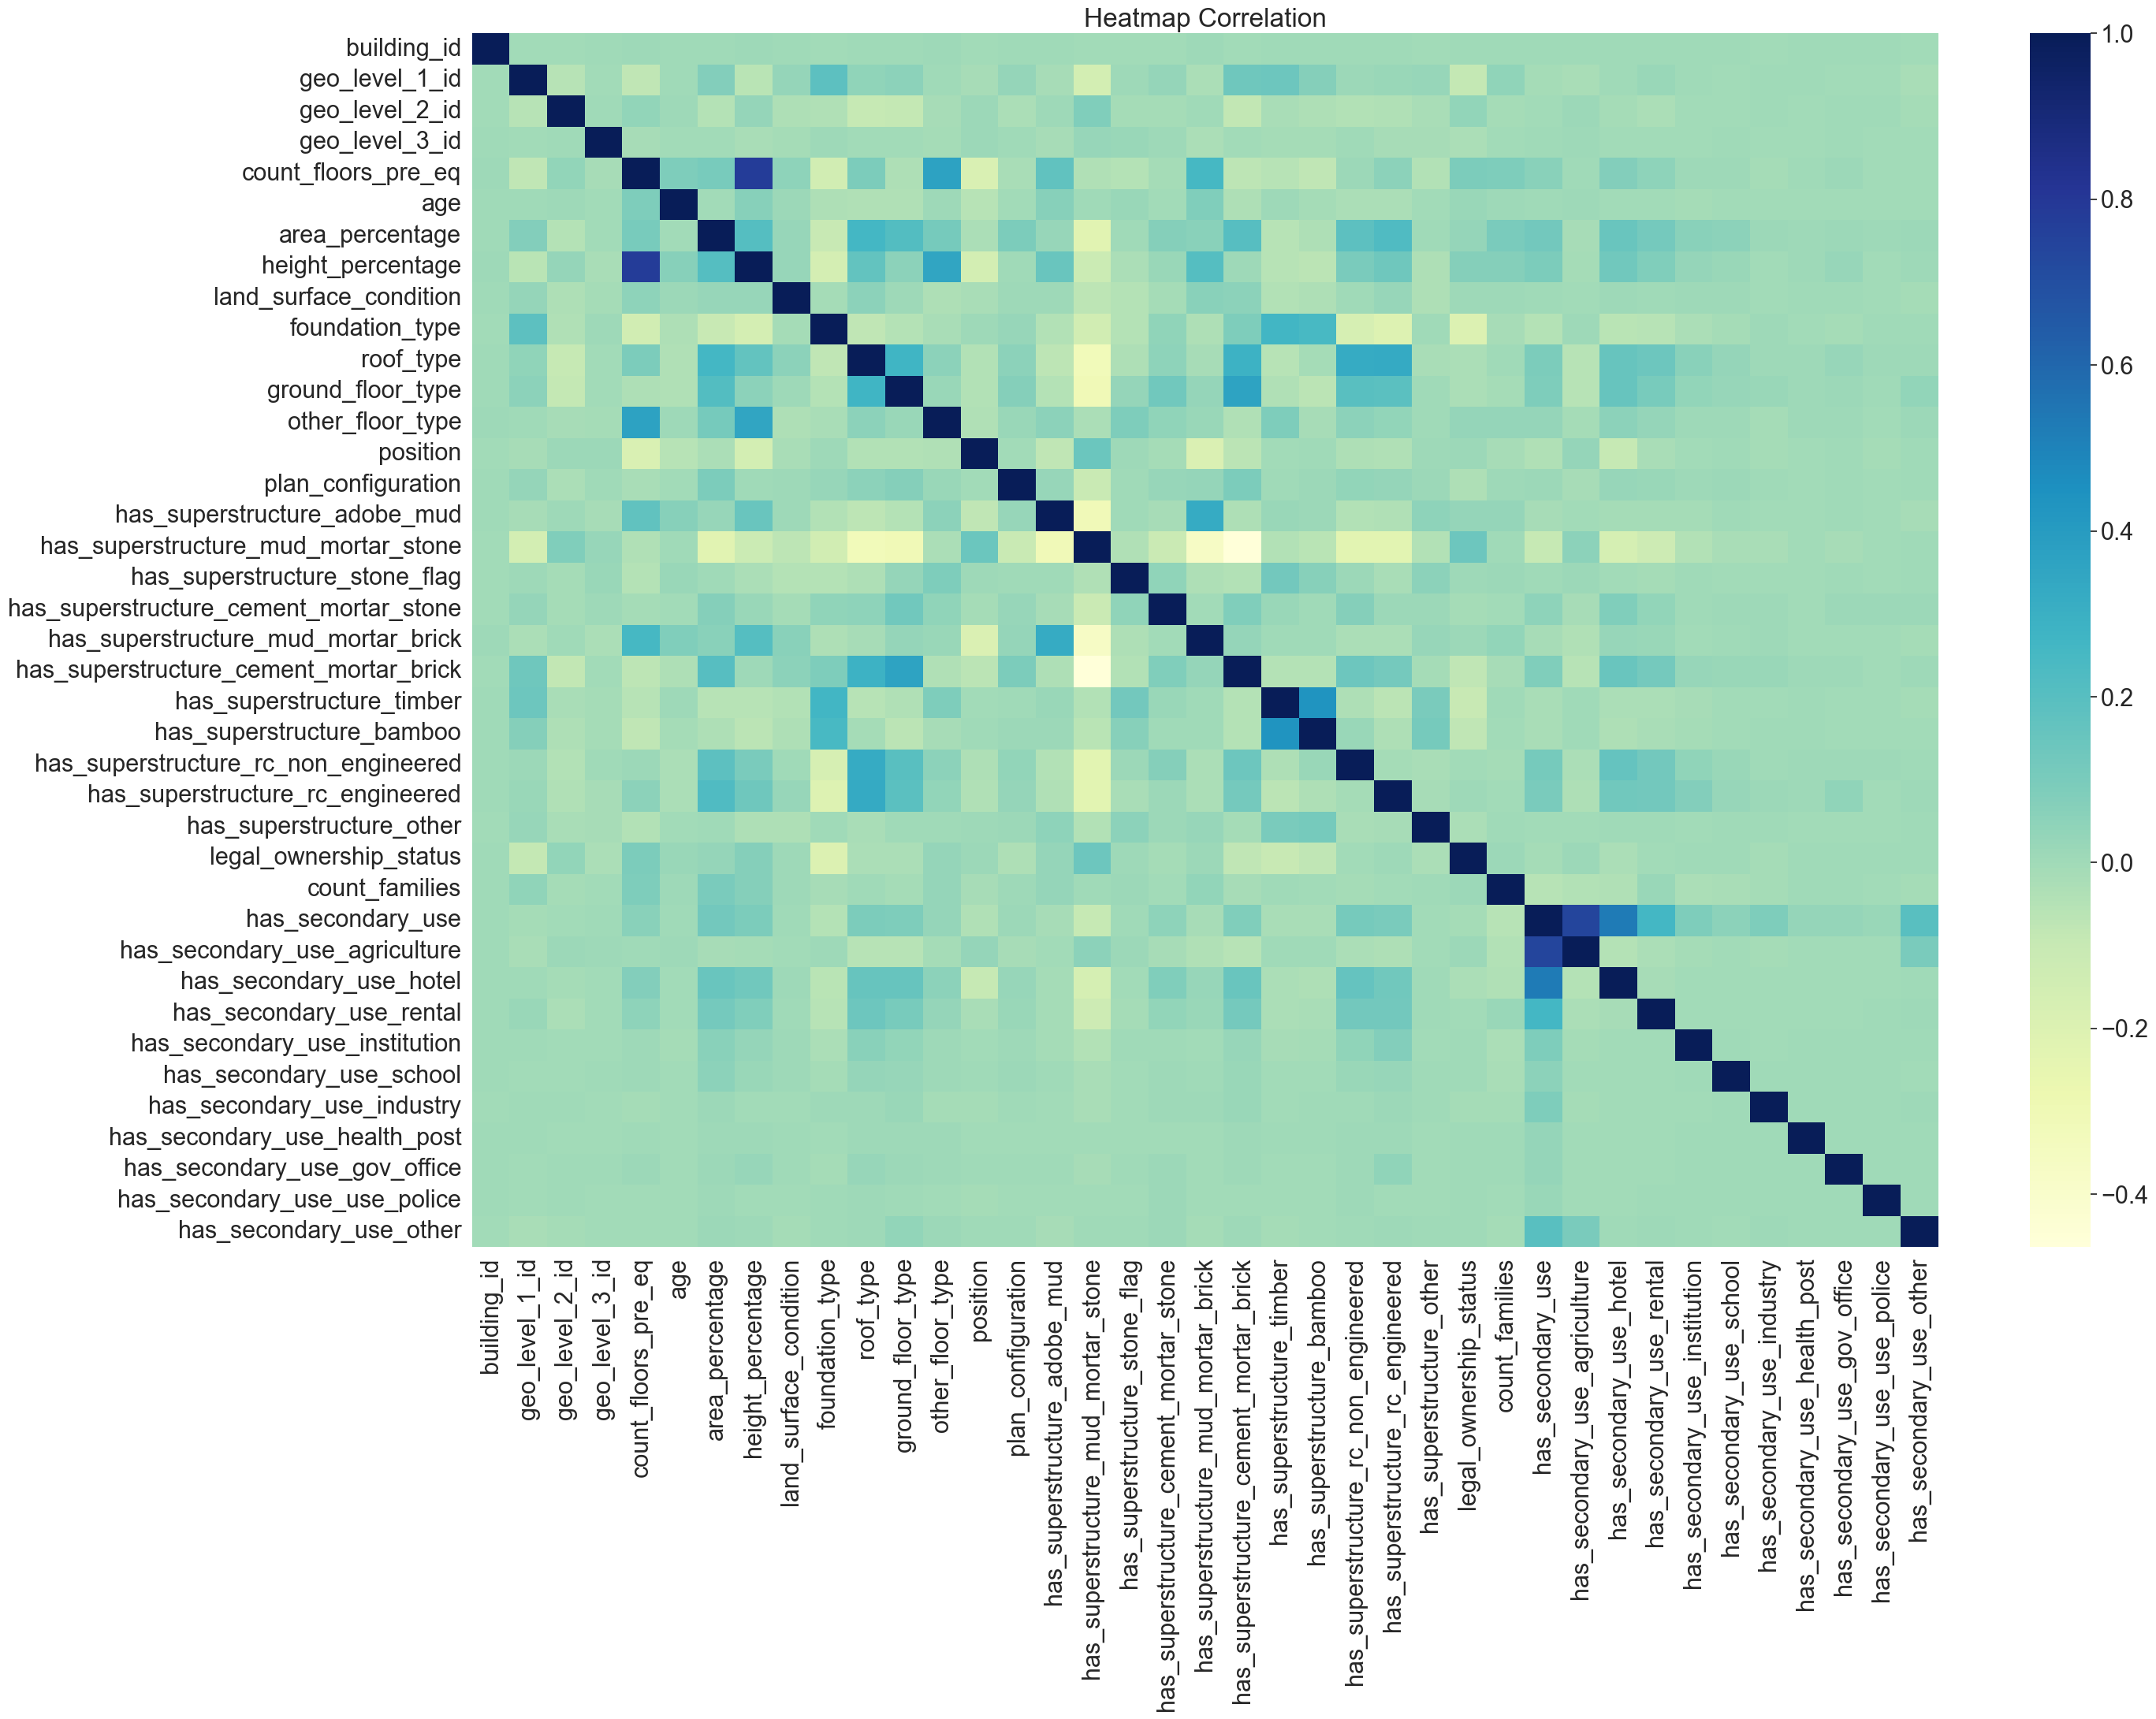

In [22]:
# Checking the correlation using heatmap again.
df_test_corr = df_test.corr()

# Displaying the heatmap.
plt.figure(figsize = (30, 20))
sns.heatmap(df_test_corr, cmap = "YlGnBu")
sns.set(font_scale = 2, style = 'white')

plt.title('Heatmap Correlation')
plt.show()

# Checking for Data Imbalance Between 3 Classifications of Damage Grade

25124
148259
87218


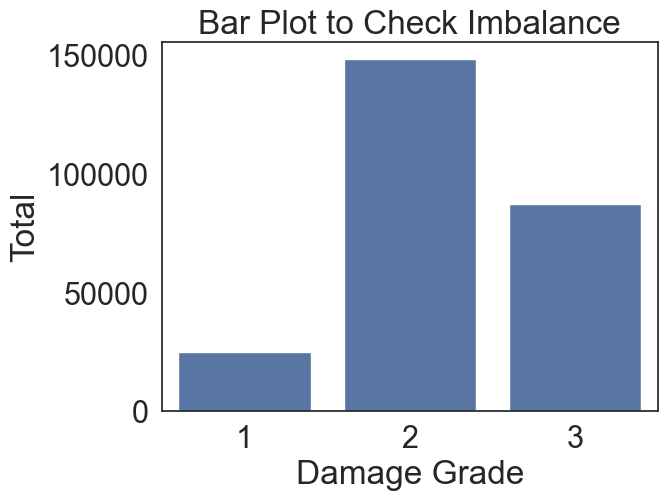

In [25]:
# Bar plot to check and visualize if there is any data imbalance.
damage_grade_1 = len(data2[data2.damage_grade == 1])
damage_grade_2 = len(data2[data2.damage_grade == 2])
damage_grade_3 = len(data2[data2.damage_grade == 3])
print(damage_grade_1)
print(damage_grade_2)
print(damage_grade_3)

bar_df_values = {'Damage Grade': ['1', '2', '3'], 'Total': [damage_grade_1, damage_grade_2, damage_grade_3]}
bad_df_values = pd.DataFrame(bar_df_values)
sns.barplot(data = bar_df_values, x = 'Damage Grade', y = 'Total')
plt.xlabel('Damage Grade')
plt.ylabel('Total')
plt.title('Bar Plot to Check Imbalance')
plt.show()

# Preparing Training Data & Validation Data

In [26]:
# Combining training data.
damage_grade = df_labels['damage_grade']
df_train = pd.concat([df_values, damage_grade], axis = 1)
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,2
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,1
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,2
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,1
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,2


In [29]:
# Partitioning data for Training Data.
limit = int(0.85 * len(df_train))
train = df_train[0:limit]
# Setting the validation data to be the last 15% of the training dataset.
val = df_train[limit:]

# Preparing Train and Test Data (X and Y Axis), Preparing Validation Data

In [31]:
# Setting Training Data
xtrain = df_train.drop(['building_id', 'damage_grade'], axis = 1)
ytrain = df_train['damage_grade']

# Setting Validation Data
xval = val.drop(['building_id', 'damage_grade'], axis = 1)
yval = val['damage_grade']

# Dropping building_id in test data.
xtest = df_test.drop(['building_id'], axis = 1)

# Scaling the Train and Test Data

In [65]:
# Scaling training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xval = scaler.transform(xval)
xtest = scaler.transform(xtest)

# Feedforward Neural Network

In [33]:
model_fnn = Sequential()

model_fnn.add(Dense(128, activation = 'relu', input_shape = (xtrain.shape[1],)))
model_fnn.add(Dense(128, activation = 'relu'))
model_fnn.add(Dense(128, activation = 'relu'))
model_fnn.add(Dense(128, activation = 'relu'))
model_fnn.add(Dense(3, activation = 'softmax'))

# Compile the model
model_fnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_fnn.summary()
history2 = model_fnn.fit(xtrain, ytrain,
                    epochs = 30,
                    validation_data = (xval, yval),
                    callbacks = [ReduceLROnPlateau(patience = 3, verbose = 1, min_lr = 1e-6),
                               EarlyStopping(patience = 5, verbose = 1)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4992      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 54915 (214.51 KB)
Trainable params: 54915 (214.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
8144/81

# FNN: Validation Data and F1 Score

In [69]:
ypred_fnn = model_fnn.predict(xval)
ypred_fnn_classes = np.argmax(ypred_fnn, axis = 1)

f1_micro = f1_score(ypred_fnn_classes, yval, average = 'micro')
print(f1_micro)

1222/1222 [==============================] - 2s 1ms/step
0.7395820009720908


# FNN: Predict Test Data and Write to CSV

In [70]:
ypred_fnn = model_fnn.predict(xtest)
ypred_fnn_classes = np.argmax(ypred_fnn, axis = 1)

2715/2715 [==============================] - 4s 1ms/step


In [41]:
# Reading CSV using Pandas: Loading submission_format.
data_fnn = pd.read_csv("submission_format.csv", delimiter = ',')
df_pred_fnn = pd.DataFrame(data_fnn)
df_pred_fnn.head()

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1


In [42]:
df_pred_fnn.drop(['damage_grade'], axis = 1, inplace = True)

In [357]:
ypred_fnn = {'damage_grade': ypred_fnn_classes}
ypred_fnn = pd.DataFrame(ypred_fnn)
df_pred_fnn = pd.concat([df_pred_fnn, ypred_fnn], axis = 1)
df_pred_fnn['damage_grade'] = df_pred_fnn['damage_grade'] + 1
df_pred_fnn.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [358]:
df_pred_fnn.to_csv('predict_fnn.csv', sep = ',', index = False)
df_read_fnn = pd.read_csv('predict_fnn.csv')
df_read_fnn

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,3
86866,442785,2


# Random Forest with GridSearch CV

In [71]:
# Creating a Random Forest Classifier Model.
rf_classifier = RandomForestClassifier()

In [ ]:
# Set parameters for GridSearch CV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [5,10,15],
    'min_samples_leaf': [1, 2]
}
# Execute GridSearch CV
grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = param_grid,
                           cv = 3,
                           scoring = 'f1_micro')
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameter obtained
print(grid_search.best_params_)
# Set the best hyperparameter
best_rf_model = grid_search.best_estimator_

# Predict the validation data using the best hyperparameter
ypred = best_rf_model.predict(xval)

# Print the Classification Report
print("Classification Report:")
print(classification_report(yval, ypred))

# Print the F1 micro score
f1_micro = f1_score(yval, ypred, average = 'micro')
print(f"F1 Micro Score: {f1_micro}")

# Random Forest Best Parameter Combination and Model Validation

In [72]:
# The best hyperparameter for the model
best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1}

In [45]:
# Execute the model with the best hyperparameter
best_rf_model = RandomForestClassifier(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    min_samples_split = best_params['min_samples_split'],
    min_samples_leaf = best_params['min_samples_leaf']
)

best_rf_model.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [48]:
# Predict using the model using validation data
ypred_rf = best_rf_model.predict(xval)

# Print the Classification Report
print("Classification Report:")
print(classification_report(yval, ypred_rf))

# Print the F1 micro score
f1_micro = f1_score(yval, ypred_rf, average = 'micro')
print(f"F1 Micro Score: {f1_micro}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3775
           1       0.86      0.95      0.90     22297
           2       0.92      0.82      0.87     13019

    accuracy                           0.88     39091
   macro avg       0.90      0.82      0.85     39091
weighted avg       0.89      0.88      0.88     39091

F1 Micro Score: 0.8820956230334348


# Feature Importances of Random Forest Model

<Axes: >

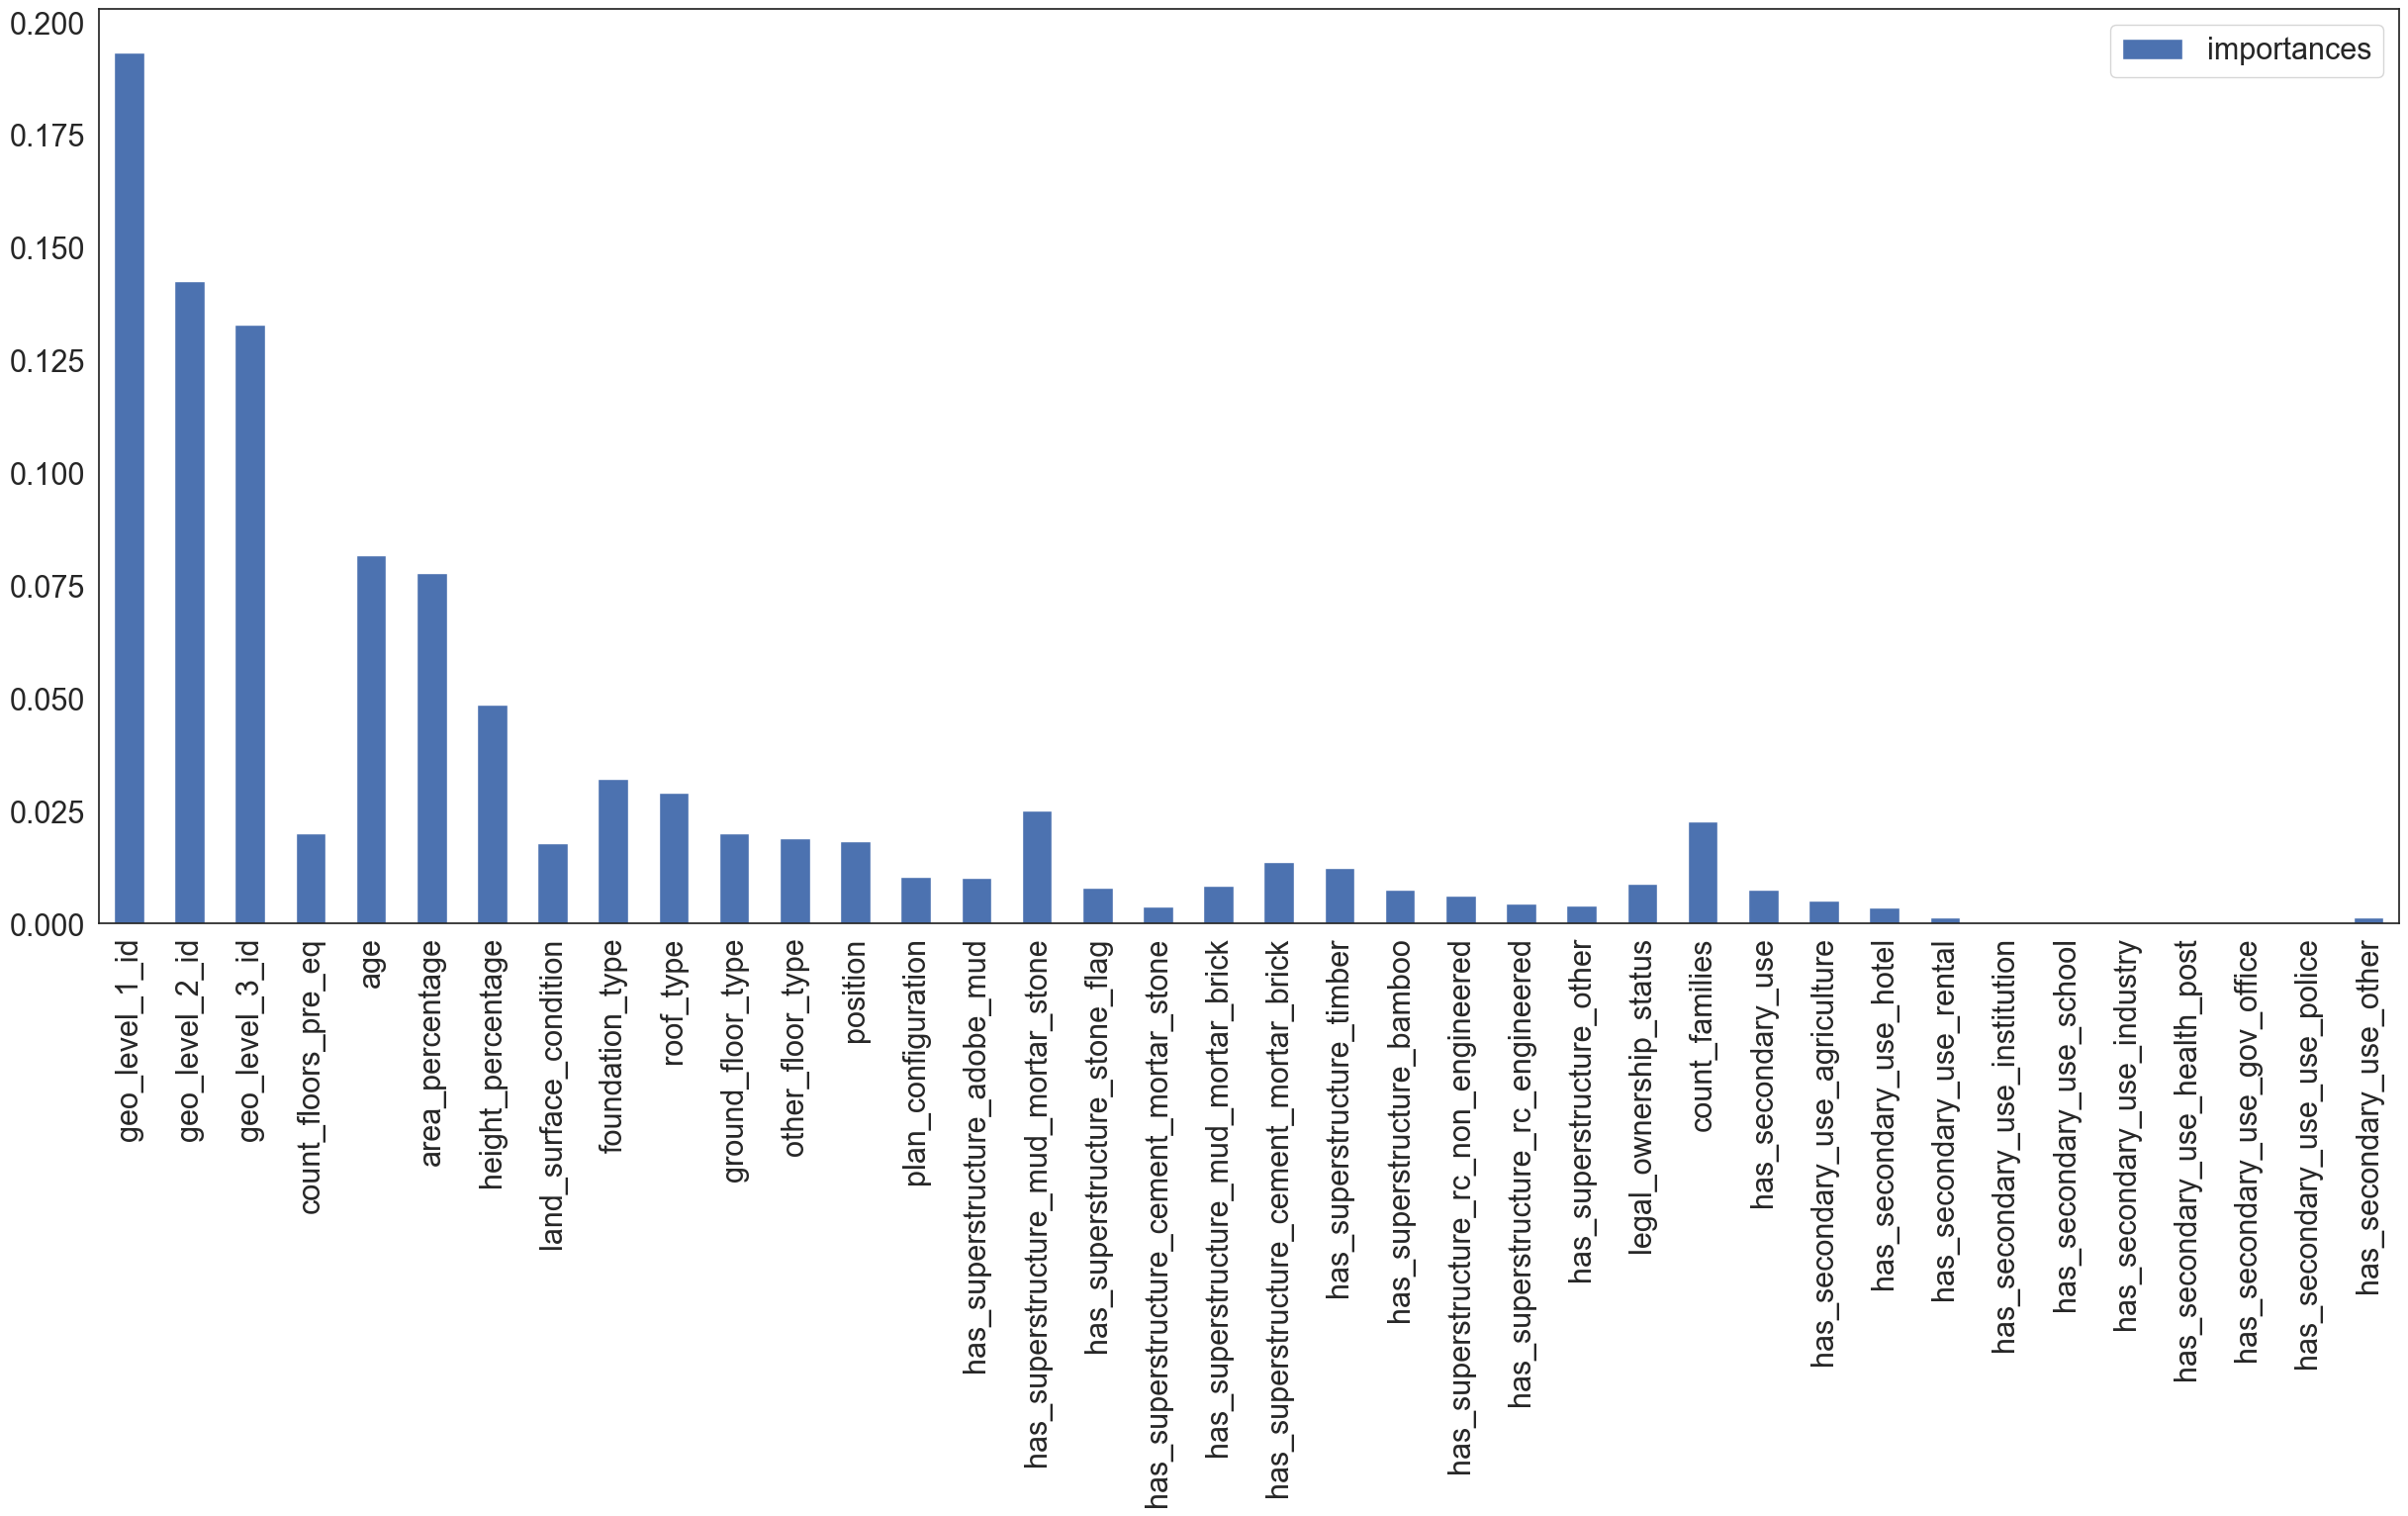

In [64]:
data1.drop(['building_id'], axis = 1, inplace = True)

# Get feature importances and graph.
df_importances = pd.DataFrame(best_rf_model.feature_importances_)
df_importances.index = data1.columns
df_importances.columns = ['importances']
df_importances.plot.bar(figsize = (30, 12))

# Predict Test Using Random Forest Best Model

In [49]:
# Predict the testing data using Random Forest Classifier using the best hyperparameter
ypred_rf = best_rf_model.predict(xtest)

In [51]:
# Reading CSV using Pandas: Loading submission_format.
data_rf = pd.read_csv("submission_format.csv", delimiter = ',')
df_pred_rf = pd.DataFrame(data_rf)
df_pred_rf.head()

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1


In [52]:
# Dropping the damage grade in the testing label data
df_pred_rf.drop(['damage_grade'], axis = 1, inplace = True)
df_pred_rf.head()

,building_id
0,300051
1,99355
2,890251
3,745817
4,421793


In [53]:
# Returning the data obtained to the original value and set the title in the data frame
ypred_rf = ypred_rf + 1
ypred_rf = {'damage_grade': ypred_rf}
ypred_rf = pd.DataFrame(ypred_rf)

In [54]:
# Combine the data frame for submission
df_pred_rf = pd.concat([df_pred_rf, ypred_rf], axis = 1)
df_pred_rf.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [56]:
# Transform the dataframe to a csv file
df_pred_rf.to_csv('predict_rf.csv', sep = ',', index = False)
df_read_rf = pd.read_csv('predict_rf.csv')
df_read_rf

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


# LightGBM With GridSearch CV

In [336]:
#Creating a LightGBM Classifier Model
lgb_classifier = lgb.LGBMClassifier(objective = 'multiclass', random_state = 5)

In [337]:
# Set parameters for GridSearch CV
param_grid_lgb = {
    'num_leaves': [80, 100],
    'learning_rate': [0.2, 0.3, 0.4],
    'n_estimators': [400, 500, 600],
    'colsample_bytree': [1.0, 0.8],
    'subsample': [0.8, 1.0],
    'max_depth': [-1]
}

# Execute GridSearch CV
grid_search = GridSearchCV(estimator = lgb_classifier, param_grid = param_grid_lgb, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameter obtained
print(grid_search.best_params_)

#best parameter
#{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 80, 'subsample': 0.8}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 260601, number of used features: 38
[LightGBM] [Info] Start training from score -2.339167
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094580
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 80, 'subsample': 0.8}


In [80]:
# The best hyperparameter for the model
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.2,
    'max_depth': -1,
    'n_estimators': 500,
    'num_leaves': 80,
    'subsample': 0.8}

In [84]:
# Execute the model with the best hyperparameter
best_lgb_model = lgb.LGBMClassifier(
    colsample_bytree = best_params['colsample_bytree'],
    learning_rate = best_params['learning_rate'],
    max_depth = best_params['max_depth'],
    n_estimators = best_params['n_estimators'],
    num_leaves = best_params['num_leaves'],
    subsample = best_params['subsample']
)

best_lgb_model.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 260601, number of used features: 38
[LightGBM] [Info] Start training from score -2.339167
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094580


LGBMClassifier(learning_rate=0.2, n_estimators=500, num_leaves=80,
               subsample=0.8)

In [85]:
# Predict the validation data using the best hyperparameter
ypred_lgb = best_lgb_model.predict(xval)

In [86]:
# Print the Classification Report
print(classification_report(yval, ypred_lgb))

# Print the F1 micro score
f1_micro = f1_score(yval, ypred_lgb, average = 'micro')
print(f"F1 Micro Score: {f1_micro}")

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      3775
           1       0.82      0.91      0.86     22297
           2       0.85      0.73      0.79     13019

    accuracy                           0.84     39091
   macro avg       0.85      0.80      0.82     39091
weighted avg       0.84      0.84      0.83     39091

F1 Micro Score: 0.8359980558184749


# Feature Importances of LightGBM Model

<Axes: >

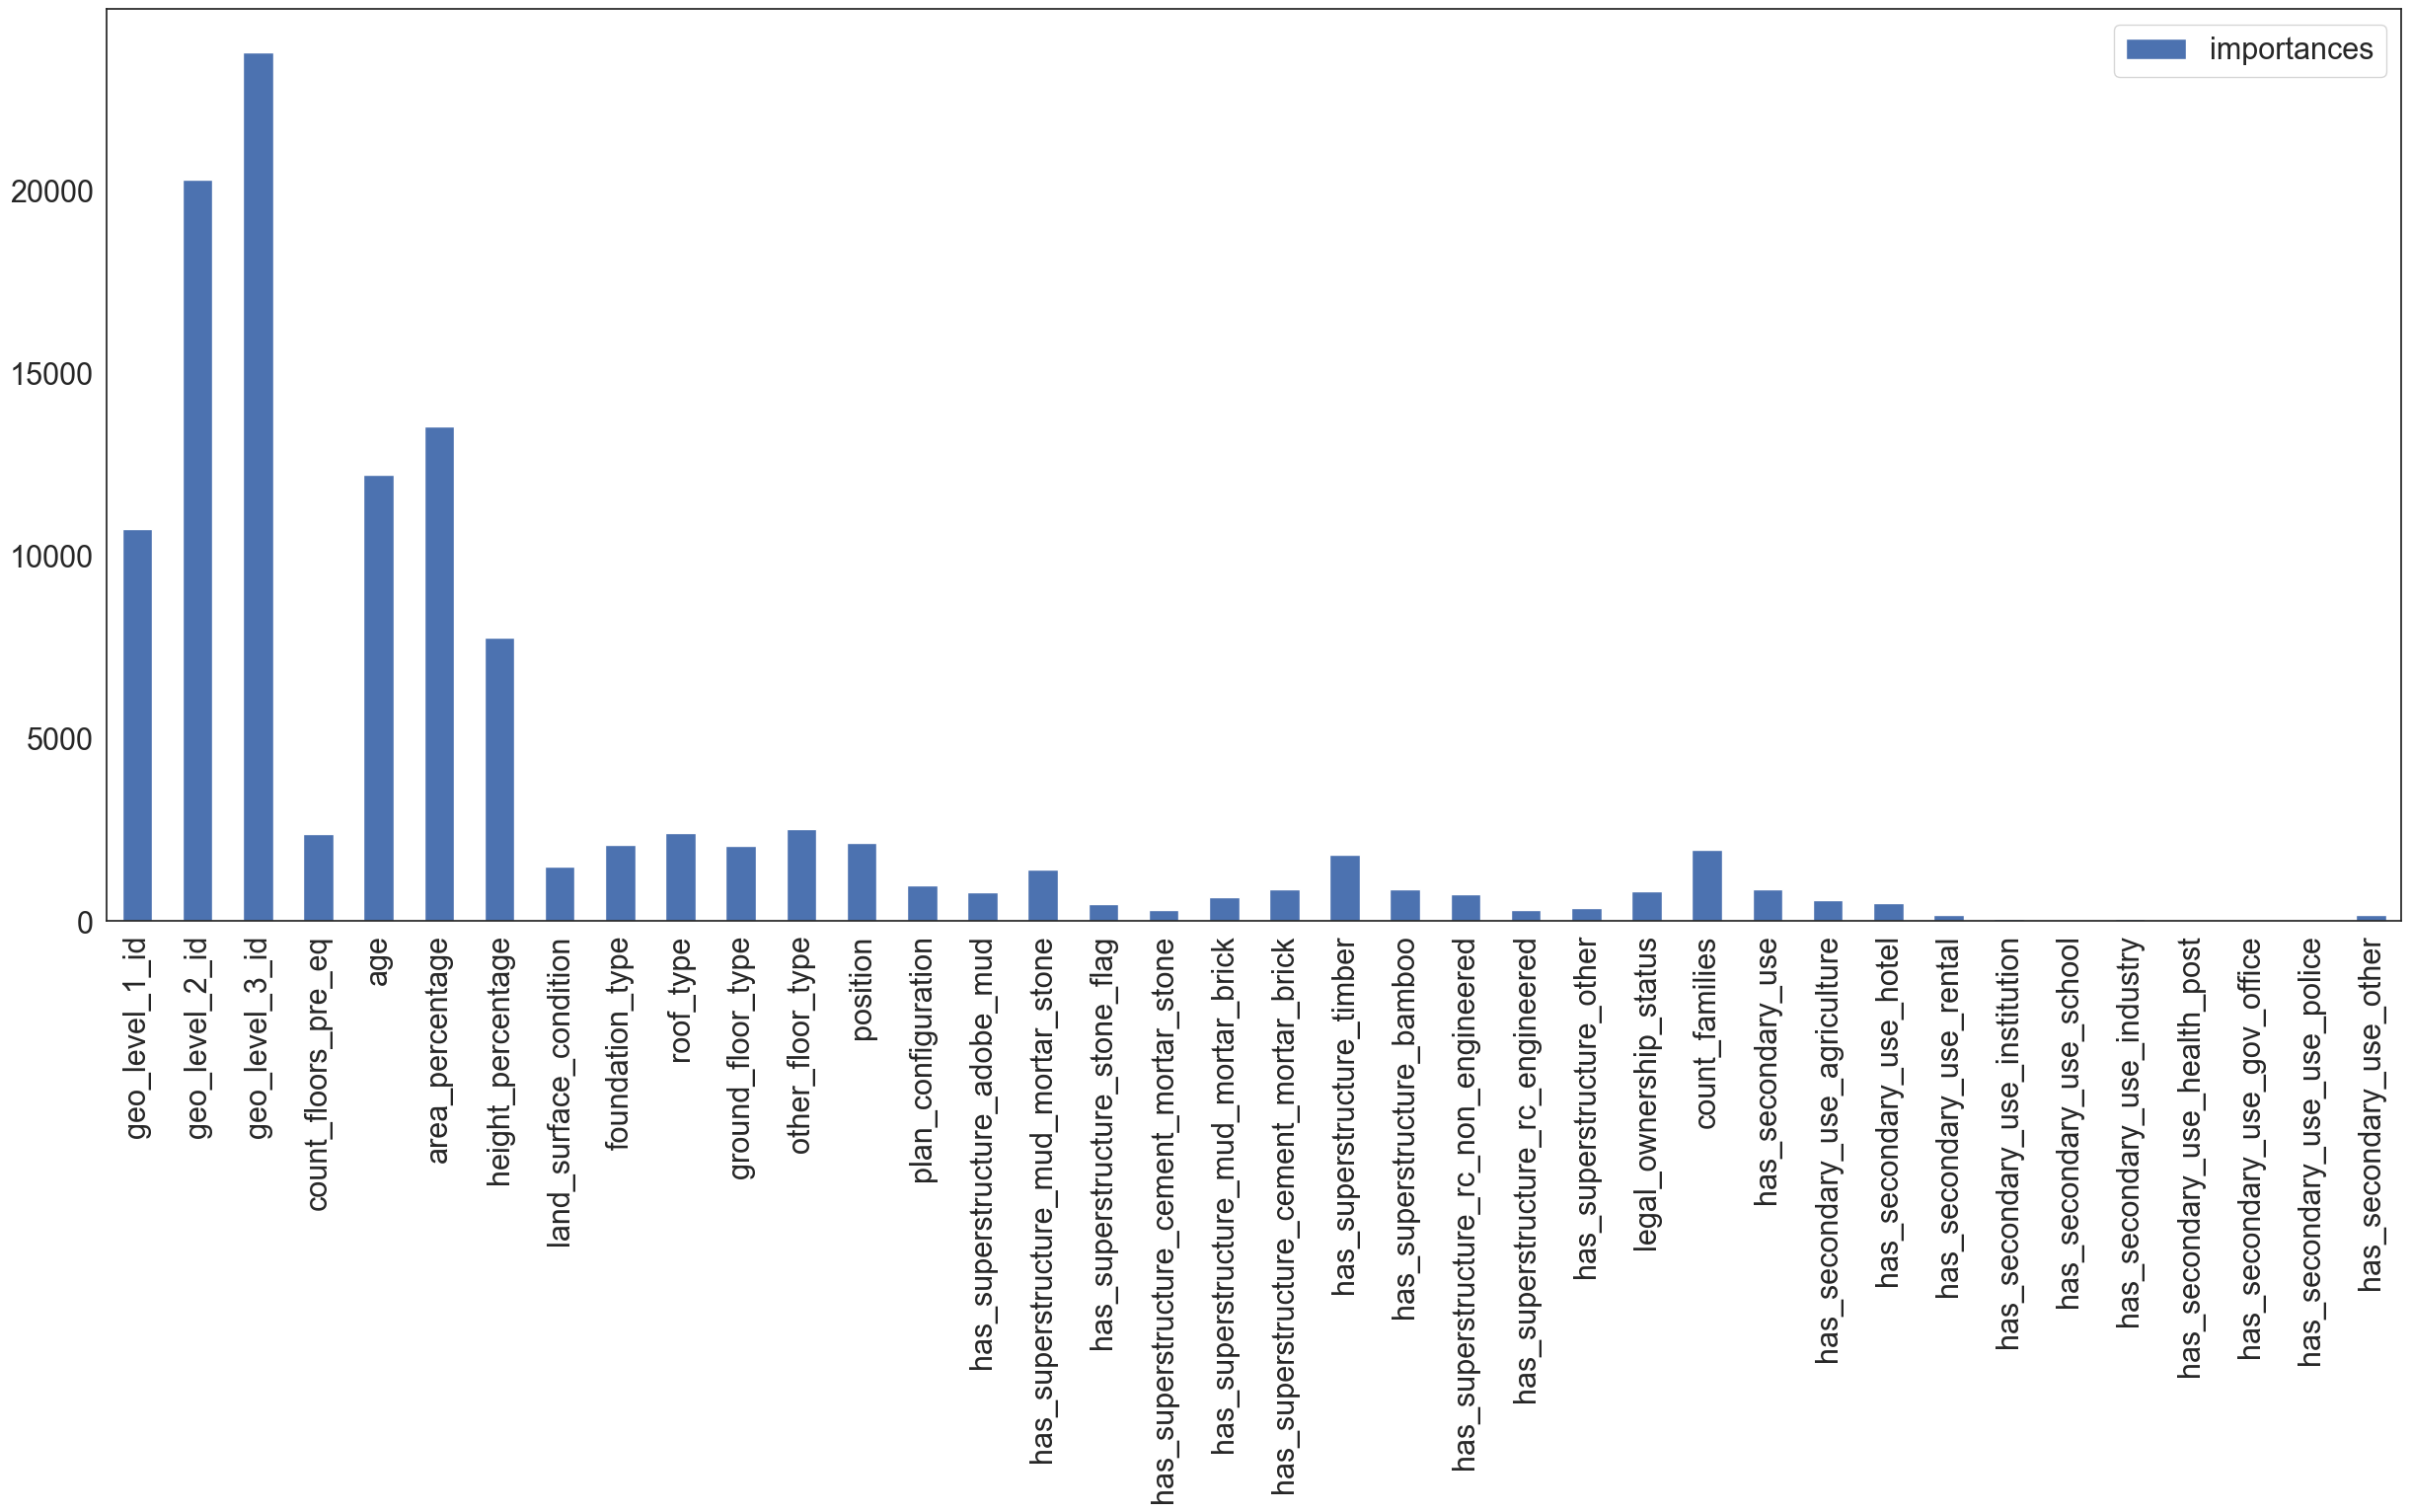

In [87]:
#drop data1 feature 'building_id'
#data1.drop(['building_id'], axis = 1, inplace = True)

#get feature importances and graph, could look further into thesee to improve the model further
df_importances = pd.DataFrame(best_lgb_model.feature_importances_)
df_importances.index = data1.columns
df_importances.columns = ['importances']
df_importances.plot.bar(figsize = (30, 12))

# Prediction using LightGBM with GridSearch CV

In [88]:
# Predict the testing data using LightGBM Classifier using the best hyperparameter
ypred_lgb = best_lgb_model.predict(xtest)
ypred_lgb

array([2, 1, 1, ..., 1, 1, 0])

In [91]:
# Reading CSV using Pandas: Loading submission_format.
data_lgb = pd.read_csv("submission_format.csv", delimiter = ',')
df_pred_lgb = pd.DataFrame(data_lgb)
df_pred_lgb.head()

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1


In [92]:
# Dropping the damage grade in the testing label data
df_pred_lgb.drop(['damage_grade'], axis = 1, inplace = True)
df_pred_lgb.head()

,building_id
0,300051
1,99355
2,890251
3,745817
4,421793


In [93]:
# Returning the data obtained to the original value and set the title in the data frame
ypred_lgb = ypred_lgb + 1
ypred_lgb = {'damage_grade': ypred_lgb}
ypred_lgb = pd.DataFrame(ypred_lgb)

In [95]:
# Combine the data frame for submission
df_pred_lgb = pd.concat([df_pred_lgb, ypred_lgb], axis = 1)
df_pred_lgb.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [96]:
# Transform the dataframe to a csv file
df_pred_lgb.to_csv('predict22.csv', sep = ',', index = False)
df_read_lgb = pd.read_csv('predict22.csv')
df_read_lgb.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3
